In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
df.shape

(3276, 10)

In [7]:
df1 = df.copy()

In [8]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [9]:
# null values
def null_value_per(data):
    nv = data.isnull().sum()
    nv = nv[nv>0]
    nv_df = pd.DataFrame({'Feature':nv.index,'NullCount':nv.values,
                         'PerNull':(nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('PerNull',ascending=False)
    return nv_df

In [10]:
nv_res = null_value_per(df)
nv_res

,Feature,NullCount,PerNull
1,Sulfate,781,23.840049
0,ph,491,14.987790
2,Trihalomethanes,162,4.945055


In [11]:
feat_to_drop = nv_res['Feature'][nv_res['PerNull']>=15].values
print(feat_to_drop)

['Sulfate']


In [12]:
df.drop(feat_to_drop,axis=1,inplace=True)
print(df.shape)
print(df.columns)

(3276, 9)
Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [13]:
df['ph'] = df['ph'].fillna(df['ph'].median())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [14]:
null_value_per(df)

,Feature,NullCount,PerNull


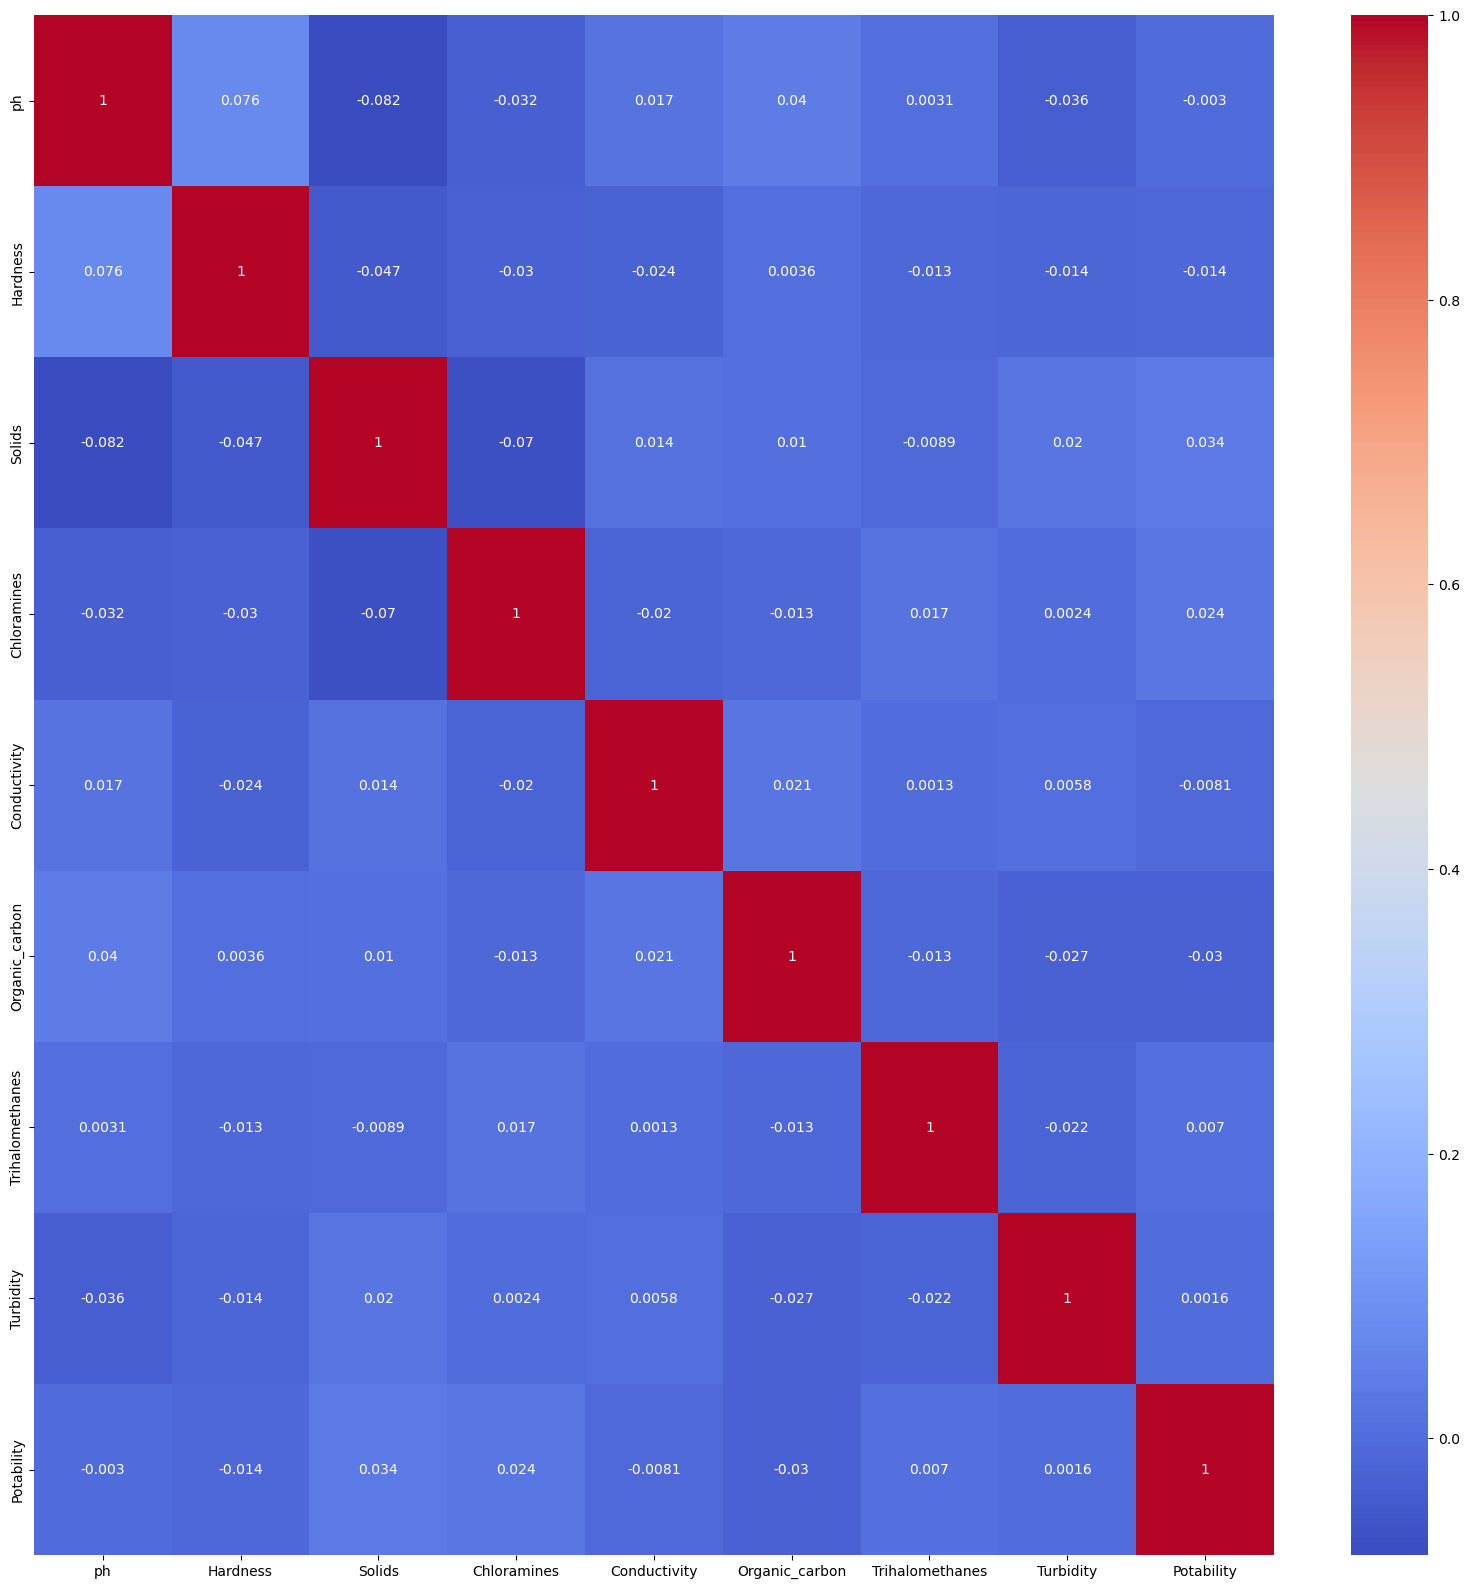

In [15]:
corr = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

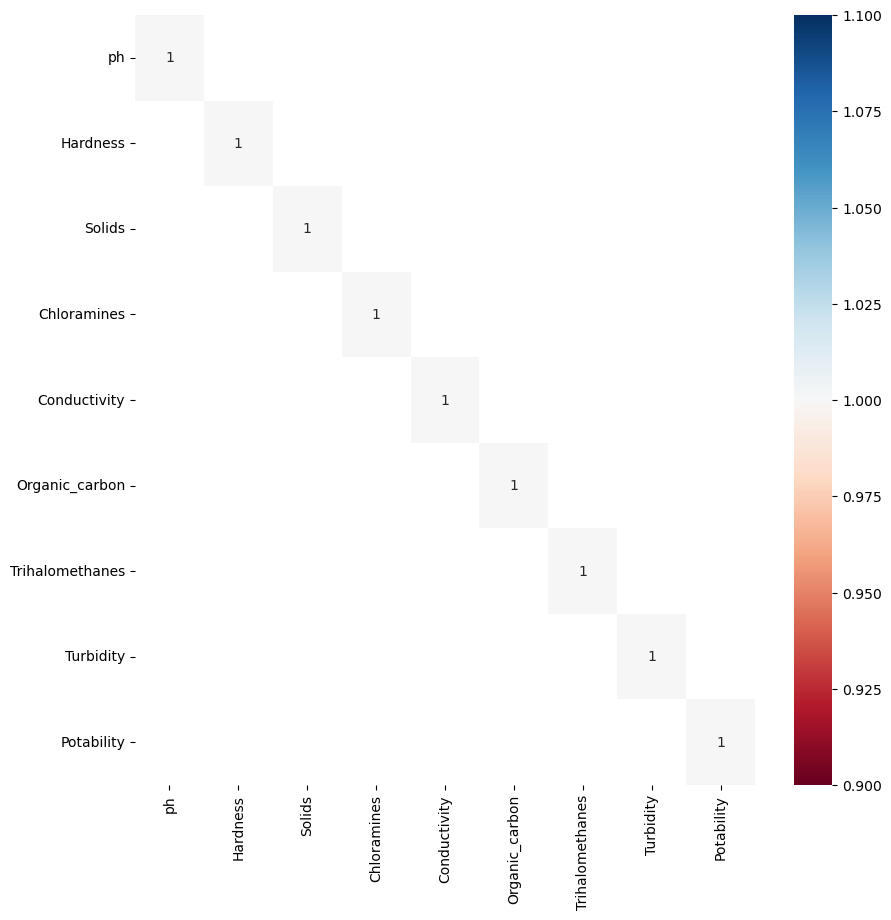

In [16]:
#correlation
corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr[abs(corr)>0.5],annot=True,cmap='RdBu')
plt.show()

In [17]:
# no multicollinearity 

# EDA

In [18]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [19]:
# Extract binary categorical columns and non-binary categorical columns¶
bin_cat = [i for i in df.columns if df[i].nunique()==2]
print(bin_cat)
non_bin_cat = [i for i in df.columns if df[i].nunique()!=2]
print(non_bin_cat)

['Potability']
['ph', 'Hardness', 'Solids', 'Chloramines', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


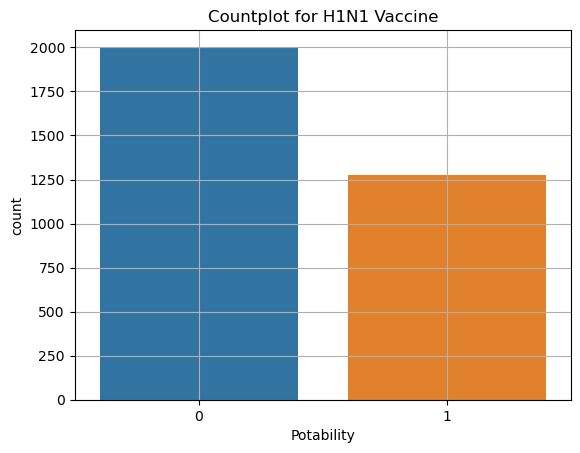

In [20]:
sns.countplot(x = df['Potability'])
plt.title('Countplot for H1N1 Vaccine')
plt.grid()
plt.show()

In [21]:
# inference: non potability of water is significantly higher than its potability

In [22]:
# # mixed both binary and non binary columns---- actegorical columns only
# cols_for_countplot = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# plt.figure(figsize=(12,30))
# for i in range(0,len(cols_for_countplot)):
#     plt.subplot(4,4,i+1)
#     sns.countplot(x = df[cols_for_countplot[i]],hue=df['Potability'],
#                   palette=['maroon','yellow'])
#     plt.title(f'Countplot for {cols_for_countplot[i]} wrt Potability')
# plt.show()

### Select x(independent feature) and y(depenndet feature)

In [23]:
x = df.drop('Potability',axis=1)
y = df['Potability']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3276, 8)
(3276,)


In [24]:
# Split data into train and test
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2293, 8)
(983, 8)
(2293,)
(983,)


In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score

In [27]:
def eval_model(ytest,ypred,model_name):
    cm = confusion_matrix(ytest,ypred)
    cr = classification_report(ytest,ypred)
    print('Confusion mtarix\n',cm)
    print('Classification Report\n',cr)
    pre_sc = precision_score(ytest,ypred)  # pre for 1
    rec_sc = recall_score(ytest,ypred)     # rec for 1
    acc_sc = accuracy_score(ytest,ypred)
    res = pd.DataFrame({'Precision':pre_sc,'Recall':rec_sc,'Accuracy':acc_sc},
                       index=[model_name])
    return res

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr1 = LogisticRegression(max_iter=10000)
lr1.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [30]:
print('Train Score',lr1.score(x_train,y_train))   # Train acc
print('Test Score',lr1.score(x_test,y_test))

Train Score 0.6022677714784126
Test Score 0.6276703967446592


In [31]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [32]:
ypred_lr1 = lr1.predict(x_test)
lr1_res = eval_model(y_test,ypred_lr1,'LogReg(thresh=0.5)')
lr1_res

Confusion mtarix
 [[617   0]
 [366   0]]
Classification Report
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       617
           1       0.00      0.00      0.00       366

    accuracy                           0.63       983
   macro avg       0.31      0.50      0.39       983
weighted avg       0.39      0.63      0.48       983



,Precision,Recall,Accuracy
LogReg(thresh=0.5),0.0,0.0,0.62767


In [33]:
print(ypred_lr1[:7])

[0 0 0 0 0 0 0]


In [34]:
from collections import Counter

In [35]:
print(Counter(y_test))
print(Counter(ypred_lr1))

Counter({0: 617, 1: 366})
Counter({0: 983})


In [36]:
ypred_prob = lr1.predict_proba(x_test)
ypred_prob[:7]

array([[0.59692702, 0.40307298],
       [0.58171493, 0.41828507],
       [0.61936311, 0.38063689],
       [0.59758646, 0.40241354],
       [0.58756985, 0.41243015],
       [0.52977155, 0.47022845],
       [0.62728776, 0.37271224]])

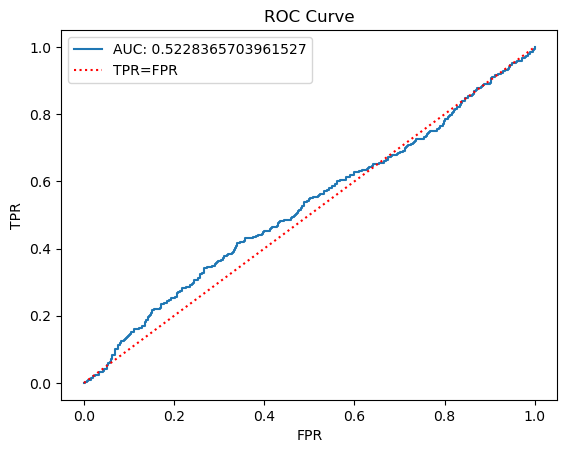

In [38]:
# ROC-AUC (Reciever Operator Characteristics, Area Under Curve)
from sklearn.metrics import roc_auc_score,roc_curve
fpr,tpr,thresh = roc_curve(y_test,ypred_prob[:,1])   # ROC curve
auc_score = roc_auc_score(y_test,ypred_prob[:,1])    # AUC_score
plt.plot(fpr,tpr,label='AUC: '+str(auc_score))
plt.plot([0,1],[0,1],color='red',linestyle='dotted',label='TPR=FPR')
plt.title('ROC Curve')
plt.xlabel('FPR')  # FP/(TN+FP)
plt.ylabel('TPR')  # TP/(TP+FN)
plt.legend()
plt.show()

In [39]:
print(len(thresh))
print(thresh)

477
[1.473743   0.473743   0.47022845 0.46199115 0.46044225 0.45908418
 0.45906404 0.44899258 0.44728477 0.44658477 0.44347736 0.44237287
 0.44179623 0.44177784 0.44171974 0.43967982 0.4390725  0.43779808
 0.43742194 0.43680401 0.43614042 0.43564429 0.43543166 0.43495061
 0.43398749 0.4336583  0.43362184 0.43302345 0.43211064 0.4319949
 0.43176088 0.43117871 0.43074253 0.43068577 0.43013447 0.42987776
 0.42952971 0.42862354 0.42743125 0.42728708 0.42620779 0.42575062
 0.42553628 0.42536637 0.42479546 0.42412915 0.42400219 0.42390612
 0.42375752 0.42338892 0.42320807 0.42310849 0.42310382 0.42298598
 0.42276646 0.42272929 0.42259444 0.42251733 0.42234894 0.42229408
 0.42203369 0.42144253 0.42142997 0.42127673 0.42123039 0.42027361
 0.42025382 0.41994659 0.41974123 0.41931432 0.41914586 0.41905117
 0.418994   0.41895384 0.41891591 0.41884625 0.41863104 0.4184618
 0.41843341 0.41829905 0.41828507 0.41821847 0.41814315 0.41796241
 0.41773151 0.41753225 0.41698349 0.41646046 0.41588776 0.41

In [40]:
# Best Threshold¶
best_thresh1 = thresh[np.argmax(abs(tpr-fpr))]
print(best_thresh1)

0.4079040024579464


In [45]:
# Generate Predictions at best threhsold
ypred_lr2 = np.where(ypred_prob[:,1]>best_thresh1,1,0)
print(ypred_lr2)
print(Counter(ypred_lr2))

[0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0
 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0
 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1
 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0
 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 

In [46]:
acc_lr2 = accuracy_score(y_test,ypred_lr2)  
pre_lr2 = precision_score(y_test,ypred_lr2)  # pre_score for 1
rec_lr2 = recall_score(y_test,ypred_lr2)     # rec_score for 1

lr2_res = pd.DataFrame({'Precision':pre_lr2,'Recall':rec_lr2,'Accuracy':acc_lr2},
                       index=[f'LogReg(th={round(best_thresh1,3)})'])
lr2_res

,Precision,Recall,Accuracy
LogReg(th=0.408),0.430556,0.338798,0.586979


In [47]:
res = pd.concat([lr1_res,lr2_res])
res

,Precision,Recall,Accuracy
LogReg(thresh=0.5),0.000000,0.000000,0.627670
LogReg(th=0.408),0.430556,0.338798,0.586979


In [48]:
from sklearn.feature_selection import RFE

In [49]:
print(x_train.shape)

(2293, 8)


In [51]:
logreg = LogisticRegression(max_iter=10000)

rfe = RFE(logreg, n_features_to_select=5)
rfe = rfe.fit(x_train, y_train)

print(rfe.support_)
print(rfe.ranking_)
print('Extracted Feature',x_train.columns[rfe.support_])

[ True  True False  True False  True False  True]
[1 1 4 1 3 1 2 1]
Extracted Feature Index(['ph', 'Hardness', 'Chloramines', 'Organic_carbon', 'Turbidity'], dtype='object')


In [52]:
len(x_train.columns[rfe.support_])

5

In [53]:
#log reg with rfe
lr3 = LogisticRegression(max_iter=10000)
lr3.fit(x_train[x_train.columns[rfe.support_]], y_train)

LogisticRegression(max_iter=10000)

In [54]:
ypred_lr3 = lr3.predict(x_test[x_train.columns[rfe.support_]])

In [55]:
lr3_res = eval_model(y_test,ypred_lr3,'LogReg_RFE')
lr3_res

Confusion mtarix
 [[617   0]
 [366   0]]
Classification Report
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       617
           1       0.00      0.00      0.00       366

    accuracy                           0.63       983
   macro avg       0.31      0.50      0.39       983
weighted avg       0.39      0.63      0.48       983



,Precision,Recall,Accuracy
LogReg_RFE,0.0,0.0,0.62767


In [56]:
res = pd.concat([lr1_res,lr2_res,lr3_res])
res

,Precision,Recall,Accuracy
LogReg(thresh=0.5),0.000000,0.000000,0.627670
LogReg(th=0.408),0.430556,0.338798,0.586979
LogReg_RFE,0.000000,0.000000,0.627670


In [57]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier

In [58]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [59]:
hparams = {'criterion':['gini','entropy'],
          'max_depth':[4,5,6,7,8],
          'min_samples_split':[8,10,12,15,20]}

In [60]:
dt_model = DecisionTreeClassifier(random_state=0)

gs1 = GridSearchCV(dt_model,param_grid=hparams,scoring='accuracy',cv=5)
gs1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_split': [8, 10, 12, 15, 20]},
             scoring='accuracy')

In [61]:
print(gs1.best_params_)
print(gs1.best_estimator_)
print(gs1.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 12}
DecisionTreeClassifier(max_depth=7, min_samples_split=12, random_state=0)
0.6066272797328539


In [62]:
# ANALYSIS OF GRID SEARCH CV RESULT
gs1_res = pd.DataFrame(gs1.cv_results_)
gs1_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.062003,0.085151,0.000000,0.000000,gini,4,8,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.583878,0.601307,0.601307,0.591703,0.572052,0.590050,0.011119,29
1,0.012499,0.006250,0.000000,0.000000,gini,4,10,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.583878,0.601307,0.601307,0.591703,0.572052,0.590050,0.011119,29
2,0.018749,0.006261,0.000000,0.000000,gini,4,12,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.583878,0.601307,0.601307,0.591703,0.572052,0.590050,0.011119,29
3,0.018750,0.006250,0.000000,0.000000,gini,4,15,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.586057,0.601307,0.601307,0.591703,0.572052,0.590485,0.010910,26
4,0.009374,0.007654,0.009374,0.007654,gini,4,20,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.586057,0.601307,0.601307,0.591703,0.572052,0.590485,0.010910,26


In [63]:
print(gs1_res.shape)
print(gs1_res.columns)

(50, 16)
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


In [64]:
gs1_res = gs1_res[['param_criterion', 'param_max_depth', 'param_min_samples_split','params',
                  'mean_test_score','rank_test_score']]
gs1_res.head()

,param_criterion,param_max_depth,param_min_samples_split,params,mean_test_score,rank_test_score
0,gini,4,8,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.590050,29
1,gini,4,10,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.590050,29
2,gini,4,12,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.590050,29
3,gini,4,15,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.590485,26
4,gini,4,20,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.590485,26


In [65]:
gs1_res.sort_values('rank_test_score').head()

,param_criterion,param_max_depth,param_min_samples_split,params,mean_test_score,rank_test_score
17,gini,7,12,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.606627,1
18,gini,7,15,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.606626,2
16,gini,7,10,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.605315,3
15,gini,7,8,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.604882,4
19,gini,7,20,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.602697,5


In [66]:
print(gs1.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 12}


In [67]:
# TRAINING DATA BASED ON GRIDSEARCH CV RESULTS
dt1 = DecisionTreeClassifier(**gs1.best_params_)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=12)

In [72]:
def gen_res(model,xtrain,xtest,ytrain,ytest,ypred,model_name):
    eval_model(ytest,ypred,model_name)
    train_acc = model.score(xtrain,ytrain)  # Train Acc
    test_acc = model.score(xtest,ytest)     # Test Acc
    pre1 = precision_score(ytest,ypred)  # pre score = 1
    rec1 = recall_score(ytest,ypred)     # rec score = 1
    res = pd.DataFrame({'Train Acc':train_acc,'Test Acc':test_acc,
                       'Pre1':pre1,'Rec1':rec1},index=[model_name])
    return res

In [77]:
ypred_dt1 = dt1.predict(x_test)
dt2_res = gen_res(dt1,x_train,x_test,y_train,y_test,ypred_dt1,'DT1_RS1(ent/gini,md='',mss='')')
dt2_res

Confusion mtarix
 [[560  57]
 [322  44]]
Classification Report
               precision    recall  f1-score   support

           0       0.63      0.91      0.75       617
           1       0.44      0.12      0.19       366

    accuracy                           0.61       983
   macro avg       0.54      0.51      0.47       983
weighted avg       0.56      0.61      0.54       983



,Train Acc,Test Acc,Pre1,Rec1
"DT1_RS1(ent/gini,md=,mss=)",0.667248,0.614446,0.435644,0.120219


In [78]:
DT1_RS1_res = eval_model(y_test,ypred_dt1,'DT1_RS1')
DT1_RS1_res

Confusion mtarix
 [[560  57]
 [322  44]]
Classification Report
               precision    recall  f1-score   support

           0       0.63      0.91      0.75       617
           1       0.44      0.12      0.19       366

    accuracy                           0.61       983
   macro avg       0.54      0.51      0.47       983
weighted avg       0.56      0.61      0.54       983



,Precision,Recall,Accuracy
DT1_RS1,0.435644,0.120219,0.614446


In [79]:
res = pd.concat([lr1_res,lr2_res,lr3_res,DT1_RS1_res])
res

,Precision,Recall,Accuracy
LogReg(thresh=0.5),0.000000,0.000000,0.627670
LogReg(th=0.408),0.430556,0.338798,0.586979
LogReg_RFE,0.000000,0.000000,0.627670
DT1_RS1,0.435644,0.120219,0.614446


In [80]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
def eval_model2(model,xtrain,xtest,ytrain,ytest,modelname):
    model.fit(xtrain,ytrain)
    print('Train Score',model.score(xtrain,ytrain))  # Train R2 Score
    print('Test Score',model.score(xtest,ytest))     # Test R2 Score
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    mae_train = mean_absolute_error(ytrain,ypred_train)
    mae_test = mean_absolute_error(ytest,ypred_test)
    mse_train = mean_squared_error(ytrain,ypred_train)
    mse_test = mean_squared_error(ytest,ypred_test)
    rmse_test = np.sqrt(mse_test)
    res = pd.DataFrame({'Train_MSE':mse_train,'Test_MSE':mse_test,
                        'RMSE':rmse_test,'Train_MAE':mae_train,'Test_MAE':mae_test},
                       index=[modelname])
    return res

In [86]:
base_rf = RandomForestRegressor(random_state=0)  # n_estimators=100

from sklearn.metrics import mean_squared_error,mean_absolute_error
base_rf_res = eval_model2(base_rf,x_train,x_test,y_train,y_test,'Base_RF')

Train Score 0.8631065862520167
Test Score 0.033357215417452846
